# Project 3

## Contents:

[Executive Summary](#executive)

[Problem Statement](#problem)

[Scraping](#scraping) (See the 1_scraper notebook for more details, and the code)

[EDA And Cleaning](#eda)

[Data Dictionary: Posts from top](#dictionary)

[Modelling](#model)

[Best Model](#bestmodel)

[Does Model Generalize To Other Situations?](#hotpost)

[Data Dictionary: Posts from 'hot'](#hotdictionary)

[Conclusion](#conclusion)

# Executive  Summary <a class="anchor" id="executive"></a>

We would like to identify what it is that makes a sentence or text interesting, and to make a computer do it for us instead of manually classifying text. However, it is difficult to get labelled data that states whether something is interesting or not, so we have turned to scraping Reddit. For this project, we scraped r/shittysuperpowers and r/godtiersuperpowers.

---

*For people who are not familiar with these 2 sub-forums of Reddit (referred to as 'subreddits'), here is a quick explanation. Reddit is essentially an online messaging board where people can submit posts and other users can view/comment on these posts. These 2 subreddits in particular both have people proposing an idea for a super power.

---

These subreddits were chosen because they have very similar content but with one key difference: posts in r/godtiersuperpowers need to be either sufficiently funny or creative per the subreddit rules. If a title is funny or creative we can say that it is more interesting. On the other hand, posts in r/shittysuperpowers just have to be not-useful superpowers so they aren't as interesting.

The data was scraped using Reddit's API, then some cleaning and data exploration was performed. It was found that posts in r/godtiersuperpowers tend to use longer sentences as well as emojis/non-standard characters, e.g. something like "ゴゴゴゴゴゴゴ". Some feature engineered columns were added and the text data standardized into lowercase English characters.

Throughout the analysis, other interested parties (stakeholders) such as writers or comedians were also considered.

---

Next, I used various NLP methods along with classification models in order to try and predict which subreddit a post was from. These include:
- Stemming/lemmatization to reduce words to their base form
- Count and TFIDF vectorizers to convert words into numeric data
- Naive Bayes, Logistic, and KNN classifiers to predict subreddit category from the numeric data

I found that the best combination was stemming, TFIDF vectorizing, then using Naive Bayes. This resulted in a 67% accuracy rate, which is better than getting a human (me) to categorize (64% accuracy).

From this model, I extracted out the most important words that the model used when classifying. It turns out that r/godtiersuperpowers has a lot of unique words which are not present in the other subreddit. From this, we can conclude that using rare or specific words can contribute to the interesting-ness of a sentence. Comedians and writers should also take note of this point in order to attract audiences.

---

We can conclude that good ways to increase the interesting-ness of text are to adhere to these 3 points:
- Be more detailed when describing something. Use more words, clarify points that may be ambigious.
- Use less common words, for example ("he ate the food" vs "he devoured the food")
- Use emojis or non-standard characters. The data shows it works! ¯\\_(ツ)_/¯.

Also, the model is somewhat successful at determining how interesting a piece of text is (at least with regards to Reddit post titles). However, as this model was trained in a very specific context, it may not necessarily generalize to other areas.

---

# Problem Statement: <a class="anchor" id="problem"></a>
We would like to develop a machine learning algorithm that can tell whether a sentence is interesting or not. However, it's troublesome to find data which is labelled as 'interesting' and 'not interesting'. Reddit however is a good place to scrape data, so we scraped posts from 2 similar subreddits.

After some discussion, our group has chosen r/shittysuperpowers and r/godtiersuperpowers as two distinct categories.

### Why these subreddits? What will it tell us about interesting sentences?

First, let's see what the differences between the subreddits are. The 2 subreddits have somewhat similar formats, in which a user proposes a novel type of super power. The differences can be seen from their guidelines/rules

r/shittysuperpowers
- "Something sort of useful, but **not really useful**"
- "No Curses: If you wouldn't want that super power, or your life would be worse with that power, it's probably a curse."

r/godtiersuperpowers
- "Things that aren't actually overpowered, but are **funny** so we pretend they are [...], let's keep that here"
- "Additionally, **creative powers**, like finding a way the above not-very-good power could actually be god tier, are at the heart of the sub"

Based on these rules, we can see that posts in r/godtiersuperpowers need to be more interesting, since the rule states that it must be more creative, or funny (which also counts as being interesting). Posts in shittysuperpowers don't have to be interesting, it just has to be not-really-useful.

#### The main benefits of developing a model that can differentiate between these 2 subreddits are:
- We can determine how interesting a post title is
- We can get a computer to test if something is interesting instead of asking another person (convenient for comedians, for example).

The scope of this is limited to reddit post titles but there may be some good information/findings from it.

### Types of Models
The data will first be cleaned and investigated. After this, there will be 3 stages to the modelling

1) Words converted into their base form using either Porter stemming, or lemmatizing

2) Words converted into a matrix using either count vectorizing, or TFIDF

3) Classification models such as logistic regression, KNN, or Naive Bayes are tested.

The best one is decided using the metrics below

### Determining Success
To determine how successful each model is, we would like to compare it to several metrics:
- Accuracy (we will be scraping approximately equal numbers of posts so the baseline is ~50%)
    - Accuracy is chosen because neither category is more 'important' and there are equal class sizes
    - Accuracy vs human (I will manually try to sort through some posts to see how accurate I am, and hopefully the computer should be able to do better)
- AUC ROC is another useful metric as it tells us how well the model can distinguish the 2 subreddits.
- I didn't use sensitivity or specificity since I didn't consider either subreddit to be more important. We want to know what is an interesting sentence, but also what is *not* an interesting sentence.

To evaluate success I will set a goal of being more accurate than a human (me). If the model can be even more accurate than that, of course it will be nice.

### Other Stakeholders
These 2 subreddits are about super powers. This is probably not that useful to everyday life, but there are a few parties who may be interested.
- Writers/TV or Film producers: per the rules, super powers in r/godtiersuperpowers should be considered funny or unexpectedly useful, both of which are good for putting in a book/film. Also these parties might want to know what people consider interesting in general.
- Social scientists investigating relationships between related communities: godtiersuperpowers seems to be an alternate version of shittysuperpowers but is there actually a difference between them?
- Comedians: They might seek inspiration about what is considered funny.
- People who want to make popular Reddit posts

# Scraping/Data Collection <a class="anchor" id="scraping"></a>
Please see the '1_Scraper' notebook where the scraping methodology and code is explained in detail.

I scraped:
- 1000 Hot posts from each subreddit using the json API
- 1000 all-time top posts from each subreddit using PRAW

I will use the top posts to build and test models. This is because the top posts are over a bigger spread of time, and has less noise (e.g. a post recently submitted to a subreddit that doesn't follow the guidelines may not be removed, but the scraper will still pick it up).

However since I also scraped the 'Hot' posts I will still use them at the end to see if my model generalizes well.

# Exploratory Data Analysis and Cleaning <a class="anchor" id="eda"></a>
Load the top posts then combine into a big dataframe

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import regex as re

# I want to read the whole row
pd.options.display.max_colwidth = 1000

In [2]:
# read in data
sub1_df = pd.read_csv("../data/scraped_subreddit_1/top_from_praw_1.csv")
sub2_df = pd.read_csv("../data/scraped_subreddit_2/top_from_praw_2.csv")

# drop unnecessary columns
sub1_df.drop("Unnamed: 0", axis = 1, inplace=True)
sub2_df.drop("Unnamed: 0", axis = 1, inplace=True)

# Add in a third column that shows whether it is subreddit 1 or 2
sub1_df["is_sub1"] = 1
sub2_df["is_sub1"] = 0

# merge into a larger dataframe
all_data = pd.concat([sub1_df, sub2_df], ignore_index=True)

# delete the original 2 dataframes from memory
%reset_selective -f sub\d_df

# change column names to be representative
all_data.rename({"0" : "title",
                 "1" : "id",
                 "2" : "timestamp"}, axis=1, inplace=True)

Sort by timestamp since the posts are chronological.

In [3]:
all_data.sort_values(by="timestamp", ascending=True, inplace=True)

### Check for bad data
Now that we have the data it is time to figure out if anything has gone horribly wrong when scraping. Check for:
- Repeated data (by means of ID column)
- Null data
- Posts that have similar titles between the 2 categories?

In [4]:
# check that there are no repeats in the ID column (ie post scraped twice)
all_data.groupby("id")["id"].value_counts().unique()

array([1], dtype=int64)

In [5]:
# check for null data
all_data.isna().sum()

title        0
id           0
timestamp    0
is_sub1      0
dtype: int64

In [6]:
# check for repeated titles
repeats = all_data[all_data["title"].duplicated(keep=False)]
repeats.head(20).sort_values(by="title")

,title,id,timestamp,is_sub1
347,Subtitles will appear when you ask someone to repeat themself.,t3_damby1,1.569707e+09,1
1153,Subtitles will appear when you ask someone to repeat themself.,t3_danw5p,1.569715e+09,0
653,This,t3_a2blwl,1.543739e+09,1
89,This,t3_aaxr15,1.546191e+09,1
771,This,t3_aoktd0,1.549658e+09,1
682,This,t3_aqd6oy,1.550101e+09,1
655,This,t3_b3yeox,1.553215e+09,1
1680,This,t3_cgjkdb,1.563832e+09,0
979,This,t3_ctwvck,1.566478e+09,0
352,You can,t3_bracw7,1.558445e+09,1


In [7]:
all_data.shape

(1907, 4)

We can see that the scraping went well (no repeats or nulls) but there were a few titles that ended up being duplicated across both subreddits. There were also 2 titles that ended up being reposted multiple times (most notably "This").

As most of the posts are not repeated, this is means that there may be some quantifiable difference between the two subreddits' top posts.

I will drop these repeated rows since they provide no meaningful information.

In [8]:
# drop the repeats
all_data.drop(repeats.index, inplace=True)

In [9]:
# check that there are no more repeats
all_data[all_data["title"].duplicated(keep=False)]

,title,id,timestamp,is_sub1


In [10]:
all_data.head()

,title,id,timestamp,is_sub1
846,"you can turn into a goose, once",t3_8hpuvr,1.525719e+09,1
805,You can punch with half the strength of someone 2x as strong as you.,t3_8hra7y,1.525729e+09,1
589,You can unpee.,t3_8rsl9y,1.529257e+09,1
874,"You are immune to clickbait, but there are 10 downsides. Number 7 will SHOCK you.",t3_8wloxs,1.530896e+09,1
872,Can we get this kid on here,t3_900ux3,1.531959e+09,1


## Word Cloud!
I decided to make a word cloud, to see what super powers were the most popular in general.

In [113]:
# Just save it to make a quick word cloud
# all_data[["title"]].to_csv("../data/forwordcloud.csv", index=False)

In [117]:
from IPython.display import Image
Image(url= "./original_data_wordcloud.png")

We can see that there are some common phrases like 'can' (e.g. you can do X) or 'every' (e.g. every time you do Y, ___ happens\). This doesn't really tell us anything so we should clean the data more, and try some modelling first.

# What data to investigate?

Since I will be vectorizing the words and using classification models, I don't think there is any need to look for specific words (that's what the classification model does so it is best to analyze the coefficients of the model instead of blindly guessing words that might be important).

On the other hand, the act of vectorizing a sentence will remove some data. We should check this data to see if its important.

## Post Submission Dates
Plot the distribution of post submission times. Also, the time will be removed before doing any modelling.

However the reason I am plotting the time is that if the top posts of a subreddit were a long time ago, and the top posts of the other subreddit are more recent, certain words could be more popular based on time. This would be bad because then the model ends up looking for specific words used at specific time periods instead of whether a sentence is interesting (which is the problem we want to solve).

In [11]:
# I just copy-pasted in the current unix time for repeatability
current_unix_time = 1601013341

# make it into days
seconds_in_day = 60 * 60 * 24

# create col of how many days ago it was
all_data["days_ago"] = all_data["timestamp"].map(
    lambda s: (current_unix_time - s)/seconds_in_day)

all_data.head()

,title,id,timestamp,is_sub1,days_ago
846,"you can turn into a goose, once",t3_8hpuvr,1.525719e+09,1,871.466563
805,You can punch with half the strength of someone 2x as strong as you.,t3_8hra7y,1.525729e+09,1,871.342697
589,You can unpee.,t3_8rsl9y,1.529257e+09,1,830.514248
874,"You are immune to clickbait, but there are 10 downsides. Number 7 will SHOCK you.",t3_8wloxs,1.530896e+09,1,811.541366
872,Can we get this kid on here,t3_900ux3,1.531959e+09,1,799.240000


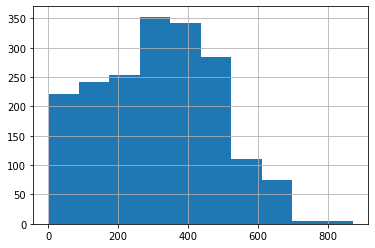

In [12]:
# make a quick plot to check nothing went really wrong (see below for nicer plots with titles)
all_data["days_ago"].hist()

Next, see if there is any pattern in the submission dates between the 2 subreddits.

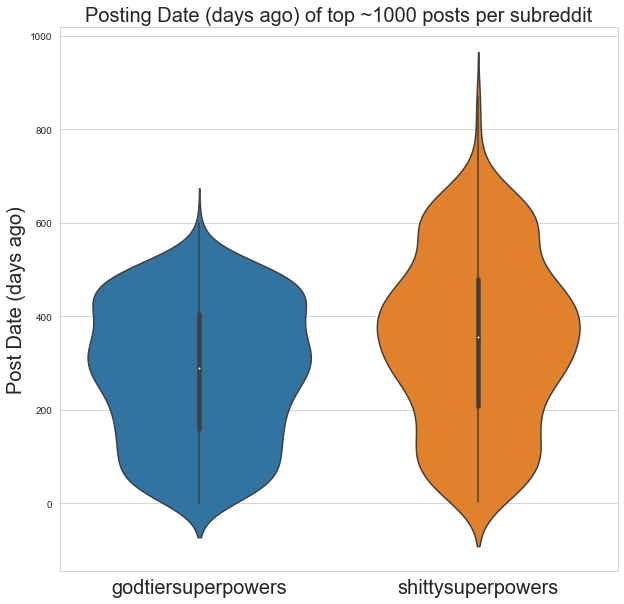

In [13]:
# Plot the distributions of post dates

sns.set_style("whitegrid")
plt.figure(figsize=(10,10))
ax = sns.violinplot(all_data["is_sub1"], all_data["days_ago"])

ax.set_ylabel("Post Date (days ago)", fontsize=20)
ax.set_xlabel("")
ax.set_xticklabels(["godtiersuperpowers", "shittysuperpowers"], fontsize=20)
ax.set_title("Posting Date (days ago) of top ~1000 posts per subreddit", fontsize=20);

We can see that r/shittysuperpowers has posts almost 1000 days ago although there aren't a lot of them. r/godtiersuperpowers seems like a spinoff so it makes sense that the posts are a bit newer. However, the means are quite close so I will not worry about it too much.

If the model predicts based on words that I know are recent slang/popular words this may cause me to revise the process.

**Note**: It looks like there are posts in the future but that's just how the plot looks (see below).

In [14]:
all_data[all_data["days_ago"] < 1]

,title,id,timestamp,is_sub1,days_ago
1562,Your in-game money can be used to buy things that need real life money in video games,t3_iyro6p,1.600927e+09,0,0.995694


## Non text characters.
I will probably remove all of these before putting it into a model however I want to see what they are.

In [15]:
def find_non_words(series):
    
    all_nonwords = set()
    nonword_regex = r"[^A-Za-z]"
    
    for one_entry in series:
        split_words = re.findall(nonword_regex, one_entry)
        
        [all_nonwords.add(s) for s in split_words]
        
    return all_nonwords

In [16]:
strange_chars = find_non_words(all_data["title"])
strange_chars

{' ',
 '!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 ':',
 ';',
 '=',
 '?',
 '[',
 ']',
 '_',
 '£',
 '¥',
 '°',
 'é',
 'ï',
 'ǝ',
 'ɐ',
 'ɓ',
 'ɔ',
 'ɥ',
 'ɯ',
 'ɹ',
 'ʇ',
 'ʍ',
 'ʎ',
 '˙',
 'ๅ',
 'ᴉ',
 '\u200e',
 '‘',
 '’',
 '“',
 '”',
 '…',
 '⅄',
 '∀',
 '「',
 '」',
 'ゴ',
 '👏',
 '😂',
 '😩',
 '🤡',
 '🦆'}

There are a lot of strange characters. Try to identify all rows where this is an issue, to see if there is any data we can extract from it.

I tried different regex to find rows with weird characters, this one seems to work the best:

In [17]:
# print rows with weird characters

# define outside loop for faster looping
# ignore 'normal' punctuation characters
weirdchar_regex = r"[^A-Za-z \,\.\!\?\d\"\-\'\%“”\’\(\)\:/]"

def has_weird_text(text):
    matches = re.findall(weirdchar_regex, text)
    
    if len(matches) > 0:
        return True
    return False

weird_text_df = all_data[all_data["title"].map(has_weird_text)]
print(weird_text_df.shape)
weird_text_df.sample(20)

(66, 5)


,title,id,timestamp,is_sub1,days_ago
1690,You know every stat about every person you meet. How many strawberries had this person eaten? 1597. What’s the longest this man has gone between saying hello? ‘He said hello at 11:18am on Thursday November 8th and did not say hello again until Tuesday 13th at 11:52. 5 days 0 hours and 34 minutes’,t3_eh7op3,1.577636e+09,0,270.569572
216,‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎,t3_hkylon,1.593843e+09,1,82.987917
185,"When you sneeze, £10 is added to your bank account, but you also slightly shit yourself.",t3_dlxrap,1.571829e+09,1,337.778866
54,You can locate any discarded amount of money under $100 in a 3km radius.,t3_a2zuyd,1.543923e+09,1,660.768576
1354,"You can change the statistical outcome of any event at will. What are the odds that I open my mailbox and find a check for $50,000? Let's made that 100%. The likelyhood of meeting my soulmate at the library today? 100%. Chances I ever die by accident or disease? That's now 0%.",t3_cs4l8c,1.566151e+09,0,403.498206
1363,You have the ability to control your IQ/schlong size ratio. +1inch = -10 IQ points and vice versa. Changes can be made once every full moon.,t3_h8lot1,1.592103e+09,0,103.132373
1595,"For every new thing you do, you get paid $50",t3_dd0gbw,1.570152e+09,0,357.189641
908,"Every time you make eye contact with someone named “Dave”, a delicious burrito will materialize in his hand…whether he wants or not.",t3_9sww8u,1.540975e+09,1,694.888426
533,You can switch the weather between 30°F and 30° C,t3_irovgs,1.599959e+09,1,12.198310
596,You can say ‘uno’ when you actually have two cards.,t3_ffj1i1,1.583701e+09,1,200.372535


In [18]:
# print out every single weird line
[print(s) for s in weird_text_df["title"]];

Every time you make eye contact with someone named “Dave”, a delicious burrito will materialize in his hand…whether he wants or not.
You can locate any discarded amount of money under $100 in a 3km radius.
I love this guy😂
You always have enough cash in your pocket for your change to be $420.69
whenever you say “howdy” to someone, a cowboy hat appears on your head for 5 seconds, and if they reply with ‘howdy’, they get a hat for 5 seconds as well
You can make any Pokémon thicc
You can earn 5$ just from making any post on reddit.
If you say "By the way, I learned to [blank] yesterday" during a conversation you will immediately be able to do that thing
Every time you put on a pair of pants, you will find a $20 bill in the front left pocket
Every time you feel tired your bank account gets $1000
You get +1% health
Every time you breathe in $10,000 is transferred into your bank account, however every time you breathe out $10,000 is transferred out of your bank account
You can change the sta

Things I found from the above:
- Ellipsis can be a charcter: "…" is not the same as 3 periods "..."
- Quotation marks come in left and right versions: “howdy” is not the same as "howdy"
- People like repeating emojis: "Putting👏claps👏between👏every👏word👏you..."
- 'Fancy' characters, such as "[...]  7,𝑡𝑜𝑦𝑜𝑢,𝑖𝑠𝑛𝑜𝑤𝑜𝑛𝑙𝑦 7" can be created via formatting text as a math equation. It's a bit unclear whether this is *actually* different text or just formatted in a different way.
- Some posts are entirely upside down text, for example "uɐᴉlɐɹʇsn∀ pɐǝɹ uɐɔ no⅄"
- Some words are split into individual letters, such as "T H E C U R E"
- One of the posts is only empty/invisible characters (the left-to-right mark)
- Some words have non-english characters that are similar to english characters: "pokémon" vs "pokemon"

There are some posts that have a lot of these special characters.

## What can be done?
It seems that most non-[A-Za-z] characters don't actually contribute to the meaning. The exceptions are:
- upside down words (which, annoyingly, are also spelled backwards)
- words formatted as math
- completely invisible post titles (if I regex replace them, the title will be null)
- Words where people may spell it with variations, like "pokémon" or "pokemon"

All other non-standard characters will be removed.

## Popularity across the 2 subreddits
I also decided to try and analyze if these non-standard characters appear more in one subreddit. Since I'm going to remove them using regex, maybe I can get something useful from them before deleting.

I will plot the popularity of each of these characters and see how many times they appear. Count vectorizer is the easiest way to do it, we just vectorize all of the punctuations instead of words.

In [19]:
from sklearn.feature_extraction.text import CountVectorizer

In [20]:
# use count vectorizer

# we define words as punctuation instead
# I filtered out commas, periods, exclamation marks, and digits also
only_nonletters_regex = r"[^A-Za-z \.\,\!\d]"

punctuation_cv = CountVectorizer(token_pattern=only_nonletters_regex)

punc_counts = punctuation_cv.fit_transform(all_data["title"])

punc_counts_df = pd.DataFrame(punc_counts.todense(), columns=punctuation_cv.get_feature_names())

In [21]:
print(punc_counts_df.shape)
punc_counts_df.columns

(1891, 53)


Index(['"', '#', '$', '%', '&', ''', '(', ')', '*', '+', '-', '/', ':', ';',
       '=', '?', '[', ']', '_', '£', '¥', '°', 'é', 'ï', 'ǝ', 'ɐ', 'ɓ', 'ɔ',
       'ɥ', 'ɯ', 'ɹ', 'ʇ', 'ʍ', 'ʎ', '˙', 'ๅ', 'ᴉ', '‎', '‘', '’', '“', '”',
       '…', '⅄', '∀', '「', '」', 'ゴ', '👏', '😂', '😩', '🤡', '🦆'],
      dtype='object')

In [22]:
# Divide this into the 2 subreddits and plot popularity...
punc_counts_df["is_sub1"] = all_data["is_sub1"]

In [23]:
# make a function that finds the occurrences and makes it nicely formatted

def make_occurrence_table(sub1_counts, sub2_counts):
    # concat the 2 columns
    new_df = pd.concat([sub1_counts, sub2_counts], axis=1)
    
    # add col for sum
    new_df["sum"] = new_df[0] + new_df[1]
    
    # change the column names
    new_df.rename({0 : "sub1",
                   1 : "sub2"}, axis=1, inplace=True)
    
    # sort by the total occurrences
    new_df.sort_values(by="sum", ascending=False, inplace=True)
    
    
    return new_df

Make a table that shows popularity of each character between the 2 subreddits

In [24]:
# count weird chars
sub1_occurrences = punc_counts_df[punc_counts_df["is_sub1"] == 1].iloc[:,:-1].astype(bool).sum()
sub2_occurrences = punc_counts_df[punc_counts_df["is_sub1"] == 0].iloc[:,:-1].astype(bool).sum()

occurrence_table = make_occurrence_table(sub1_occurrences, sub2_occurrences)
occurrence_table

,sub1,sub2,sum
',104,129,233
’,60,77,137
"""",53,74,127
%,43,43,86
“,31,40,71
”,30,40,70
-,27,41,68
/,23,28,51
(,24,10,34
),24,10,34


It's pretty clear that there isn't enough data to look at each atypical character individually. I will try and see if the less-used ones are more popular (in general) on any subreddit.

In [25]:
# See if any subreddit has more 

# for symbols with <100 occurrences
print("Number of posts containing symbols with <100 occurrence")
print(occurrence_table[occurrence_table["sum"] < 100].sum())

print()

print("Number of posts containing symbols with <50 occurrence")
print(occurrence_table[occurrence_table["sum"] < 50].sum())

print()

print("Number of posts containing symbols with <10 occurrence")
print(occurrence_table[occurrence_table["sum"] < 10].sum())

print()

print("Number of posts containing symbols with <5 occurrence")
print(occurrence_table[occurrence_table["sum"] < 5].sum())

Number of posts containing symbols with <100 occurrence
sub1    253
sub2    288
sum     541
dtype: int64

Number of posts containing symbols with <50 occurrence
sub1     99
sub2     96
sum     195
dtype: int64

Number of posts containing symbols with <10 occurrence
sub1    23
sub2    45
sum     68
dtype: int64

Number of posts containing symbols with <5 occurrence
sub1    19
sub2    36
sum     55
dtype: int64


We can see that for these less-used characters, they appear more often in r/godtiersuperpowers for whatever reason so I'll put a column that indicates whether these weird characters are present.

I don't want to count how many of the characters there are since a sentence like "Putting👏claps👏between👏every..." would end up with a lot, even though it's the same character.

Also, there were only about 68 of these posts, which is about 3% so it wasn't really worth investigating. I still added it in as a column since I already went through the process of sorting it, however this probably won't have much of an effect so I didn't bother adding a chart here.

In [26]:
# based on EDA I identified the most common punctuation
# so anything not in this, is considered 'weird'. This only works for English text obv
weird_chars_regex = r"[^A-Za-z \.\,\!\d\'\’\"\%\“\”\-\/\(\)\$\:\?]"

all_data["has_weird_chars"] = all_data["title"].map(
    lambda s: 1 if  len(re.findall(weird_chars_regex, s))!=0 else 0)

all_data.head()

,title,id,timestamp,is_sub1,days_ago,has_weird_chars
846,"you can turn into a goose, once",t3_8hpuvr,1.525719e+09,1,871.466563,0
805,You can punch with half the strength of someone 2x as strong as you.,t3_8hra7y,1.525729e+09,1,871.342697,0
589,You can unpee.,t3_8rsl9y,1.529257e+09,1,830.514248,0
874,"You are immune to clickbait, but there are 10 downsides. Number 7 will SHOCK you.",t3_8wloxs,1.530896e+09,1,811.541366,0
872,Can we get this kid on here,t3_900ux3,1.531959e+09,1,799.240000,0


In [27]:
all_data.sample(5)

,title,id,timestamp,is_sub1,days_ago,has_weird_chars
989,You are invincible if you can't fly,t3_d2c1vh,1.568140e+09,0,380.472731,0
1258,"When there is something wrong with you, you will immediately know what's wrong and what to do.",t3_hprb5g,1.594544e+09,0,74.876921,0
120,You now have 51% chance to win a coin flip,t3_by8pot,1.560005e+09,1,474.628611,0
1381,Anything that fits in your mouth is now edible and has exclusively positive health benefits.,t3_g2udmv,1.587095e+09,0,161.089051,0
1642,"Every time you're feeling sad or worthless, Keanu Reeves appears next to you and tells you you're breathtaking",t3_bzdigw,1.560265e+09,0,471.624387,0


## Words formatted as math equations:
For some reason, words were able to be formatted as math. Here is an example.

In [28]:
all_data[all_data.index == 790]

,title,id,timestamp,is_sub1,days_ago,has_weird_chars
790,"Every time you breathe in $10,000 is transferred into your bank account, however every time you breathe out $10,000 is transferred out of your bank account",t3_cns94t,1.565299e+09,1,413.356435,0


In [29]:
all_data[all_data.index == 790]["title"]

790    Every time you breathe in $10,000 is transferred into your bank account, however every time you breathe out $10,000 is transferred out of your bank account
Name: title, dtype: object

It turns out that markdown is formatting it as an equation because of the 2 dollar signs. Like this:

- $math$

is just

- \\$ math \$

It isn't formatted differently in the data, it's just displaying wrongly in the jupyter notebook. So this isn't an issue.

### Completely invisible post titles:
Most of the time, there isn't any point in having invisible characters in a post title as readers will not be able to tell it is there. Also this only happens once.

In [30]:
all_data[all_data.index == 216]

,title,id,timestamp,is_sub1,days_ago,has_weird_chars
216,‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎ ‎,t3_hkylon,1.593843e+09,1,82.987917,1


For the purposes of this analysis it does nothing as it will either be in the training data and be completely unique or in the test data and give an error, so I'll probably just remove it.

In [31]:
all_data.drop(all_data[all_data["id"] == "t3_hkylon"].index, inplace=True)

### Upside Down Characters
There were a few posts with upside down text. They were:
- "˙uɐᴉlɐɹʇsn∀ pɐǝɹ uɐɔ no⅄"
- "ɹǝɓuɐp ǝʇɐᴉpǝɯɯᴉ uᴉ ǝๅᴉɥʍ uɐᴉๅɐɹʇsnɐ uᴉ ǝdʎʇ uɐɔ noʎ"

both of which relate to Australia

In [32]:
all_data[all_data["title"].str.contains("uɐɔ")]

,title,id,timestamp,is_sub1,days_ago,has_weird_chars
61,˙uɐᴉlɐɹʇsn∀ pɐǝɹ uɐɔ no⅄,t3_cxtcdl,1.567238e+09,1,390.916898,1
105,ɹǝɓuɐp ǝʇɐᴉpǝɯɯᴉ uᴉ ǝๅᴉɥʍ uɐᴉๅɐɹʇsnɐ uᴉ ǝdʎʇ uɐɔ noʎ,t3_iur5uv,1.600373e+09,1,7.412951,1


This kind of upside down text only occurs in shittysuperpowers. It's not common and also only in one subreddit so I just dropped it.

In [33]:
all_data.drop(all_data[all_data["id"] == "t3_cxtcdl"].index, inplace=True)
all_data.drop(all_data[all_data["id"] == "t3_iur5uv"].index, inplace=True)

## Words with different 'spellings'
The best example is "pokémon" vs "pokemon" although there are a few other situations where this occurs too. I will replace letters that look like english chars, with the equivalent english char.

It's not too complicated to do this so I just made a function below.

This is a very English-centric approach and doesn't consider languages where these characters are actually distinct characters, however this is an English based subreddit so I am ok with making this simplifying assumption.

In [34]:
def replace_diacritics(text):
    
    # Found some common ones here
    # https://www.thoughtco.com/what-is-a-diacritic-mark-1690444
    common_letters = {'é' : 'e',
                      'ç' : 'c',
                      'à' : 'a',
                      'ô' : 'o',
                      'ë' : 'e',
                      'ö' : 'o',
                      'ï' : 'i',
                      'è' : 'e',
                      'ā' : 'a',
                      'ñ' : 'n',
                      'ã' : 'a'}
    for key, value in common_letters.items():
        if key not in text:
            continue
        text = text.replace(key, value)
    return text

In [35]:
all_data["title"] = all_data["title"].map(replace_diacritics)

## Sentence length
The last thing I can think of to extract information from the text (apart from the whole vectorizing process done later) is the sentence length.

Plot the distribution of sentence lengths between the 2 subreddits.

In [36]:
def sentence_len(text):
    only_chars = r"[^A-Za-z]"

    text = re.sub(only_chars, " ", text)
        
    return len(text.split())

In [37]:
all_data["sentence_len"] = all_data["title"].map(sentence_len)

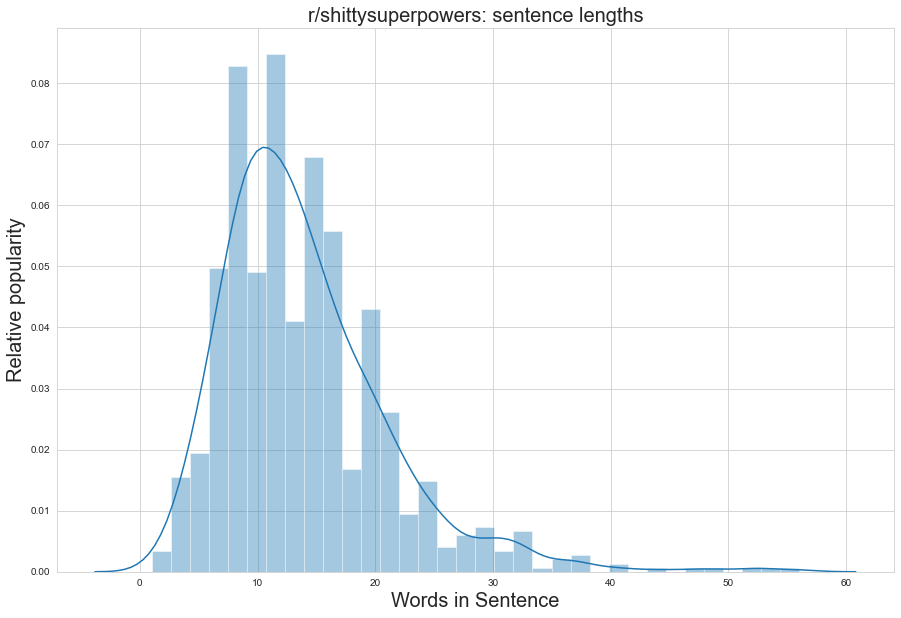

In [38]:
sns.set_style("whitegrid")
plt.figure(figsize=(15,10))

ax = sns.distplot(all_data[all_data["is_sub1"] == 1]["sentence_len"])

ax.set_ylabel("Relative popularity", fontsize=20)
ax.set_xlabel("Words in Sentence", fontsize=20)
ax.set_title("r/shittysuperpowers: sentence lengths", fontsize=20);

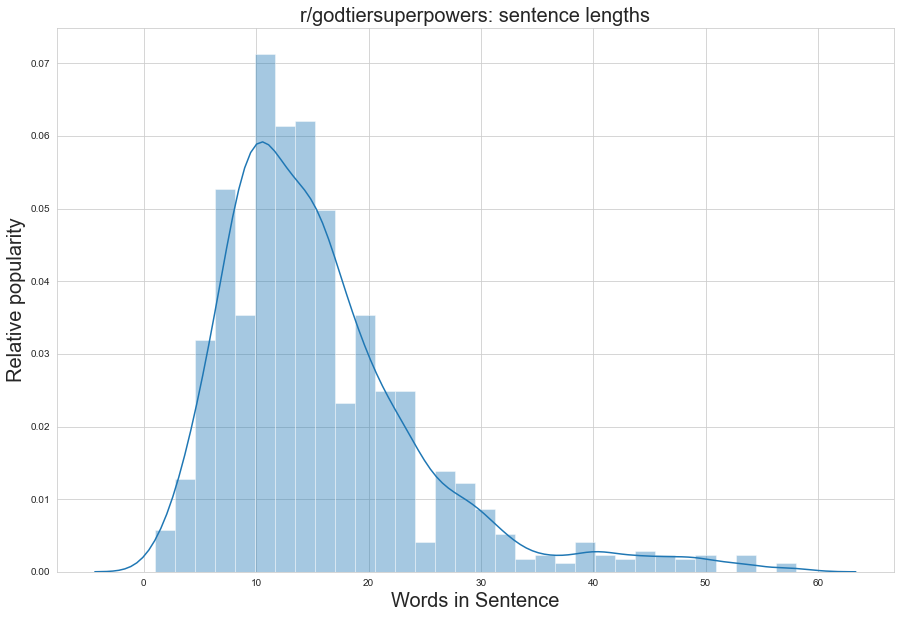

In [39]:
plt.figure(figsize=(15,10))
ax = sns.distplot(all_data[all_data["is_sub1"] == 0]["sentence_len"])

ax.set_ylabel("Relative popularity", fontsize=20)
ax.set_xlabel("Words in Sentence", fontsize=20)
ax.set_title("r/godtiersuperpowers: sentence lengths", fontsize=20);

In [40]:
# get the means of both subreddits:
print(all_data[all_data["is_sub1"] == 1]["sentence_len"].mean())

print(all_data[all_data["is_sub1"] == 0]["sentence_len"].mean())

13.985854189336235
15.682146542827658


Surprisingly the means are kind of different so let's use a t-test to see if they are the same.

In [41]:
from scipy.stats import ttest_ind

ttest_ind(all_data[all_data["is_sub1"] == 1]["sentence_len"],
          all_data[all_data["is_sub1"] == 0]["sentence_len"])

Ttest_indResult(statistic=-4.491825237248447, pvalue=7.489254901067547e-06)

The p value is small so it is unlikely that this is up to chance. Therefore we can conclude that godtiersuperpowers are, on average, a bit longer. So this is good to know when trying to make a model.

### Important note for stakeholders
The EDA shows that longer sentences are on average more interesting since r/godtiersuperpowers is supposed to be more creative/funny than r/shittysuperpowers and the sentences are longer. So if you want to make a creative or funny sentence for your book/show, maybe make it longer and more detailed.

## Box plot of sentence lengths
It's easier to compare than the histograms above.

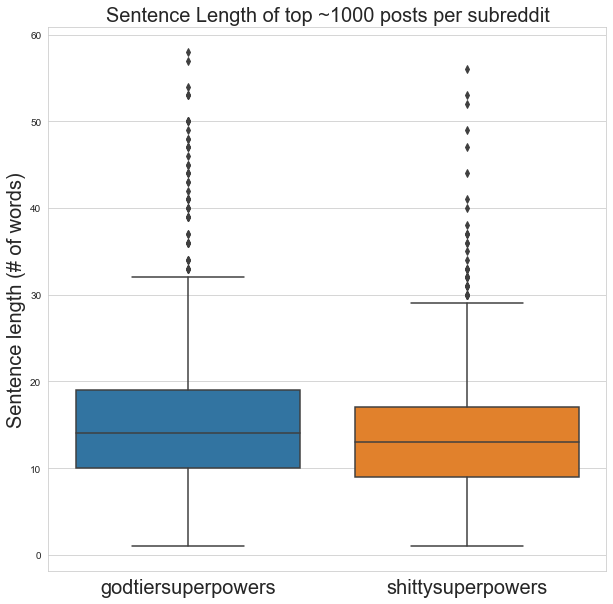

In [42]:
# boxplot of sentence lengths
sns.set_style("whitegrid")
plt.figure(figsize=(10,10))
ax = sns.boxplot(all_data["is_sub1"], all_data["sentence_len"])

ax.set_ylabel("Sentence length (# of words)", fontsize=20)
ax.set_xlabel("")
ax.set_xticklabels(["godtiersuperpowers", "shittysuperpowers"], fontsize=20)
ax.set_title("Sentence Length of top ~1000 posts per subreddit", fontsize=20);

There are outliers but just with regards to sentence length, its not enough grounds to remove them.

### Word Lengths
Another thing that the vectorized words model won't consider is how long the average word is. Maybe one subreddit has more complicated words, which could be more interesting. 

Vectorized words in a matrix don't consider this, they just consider how often a word appears. Therefore we should investigate this too.

In [188]:
def word_lengths(text):
    
    # replace non words with space, except apostrophe
    regex_str = r"[^A-Za-z\'\’]"
    regex_apostrophe = "[\’\']"
    text = re.sub(regex_str, " ", text)
    text = re.sub(regex_apostrophe, "", text)
    
    # find the average word length
    words = text.split()
    
    word_lengths = []
    
    for word in words:
        word_lengths.append(len(word))
        
    return np.mean(word_lengths)

In [189]:
all_data["avg_word_len"] = all_data["title"].map(word_lengths)

In [190]:
all_data.head()

,title,id,timestamp,is_sub1,days_ago,has_weird_chars,sentence_len,avg_word_len
846,you can turn into a goose once,t3_8hpuvr,1.525719e+09,1,871.466563,0,7,3.428571
805,you can punch with half the strength of someone x as strong as you,t3_8hra7y,1.525729e+09,1,871.342697,0,14,3.785714
589,you can unpee,t3_8rsl9y,1.529257e+09,1,830.514248,0,3,3.666667
874,you are immune to clickbait but there are downsides number will shock you,t3_8wloxs,1.530896e+09,1,811.541366,0,13,4.692308
872,can we get this kid on here,t3_900ux3,1.531959e+09,1,799.240000,0,7,3.000000


Plot the word lengths between the two subreddits

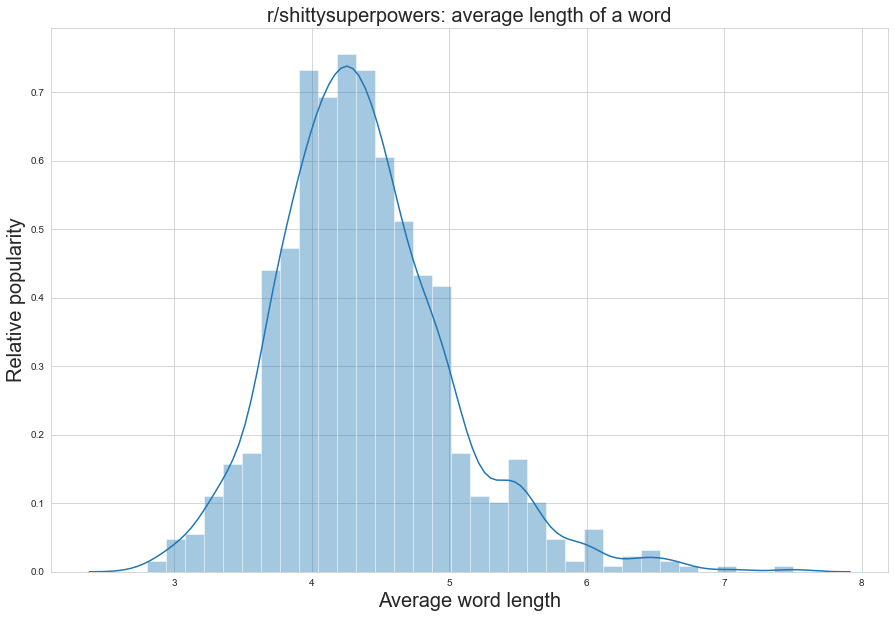

In [191]:
sns.set_style("whitegrid")
plt.figure(figsize=(15,10))

ax = sns.distplot(all_data[all_data["is_sub1"] == 1]["avg_word_len"])

ax.set_ylabel("Relative popularity", fontsize=20)
ax.set_xlabel("Average word length", fontsize=20)
ax.set_title("r/shittysuperpowers: average length of a word", fontsize=20);

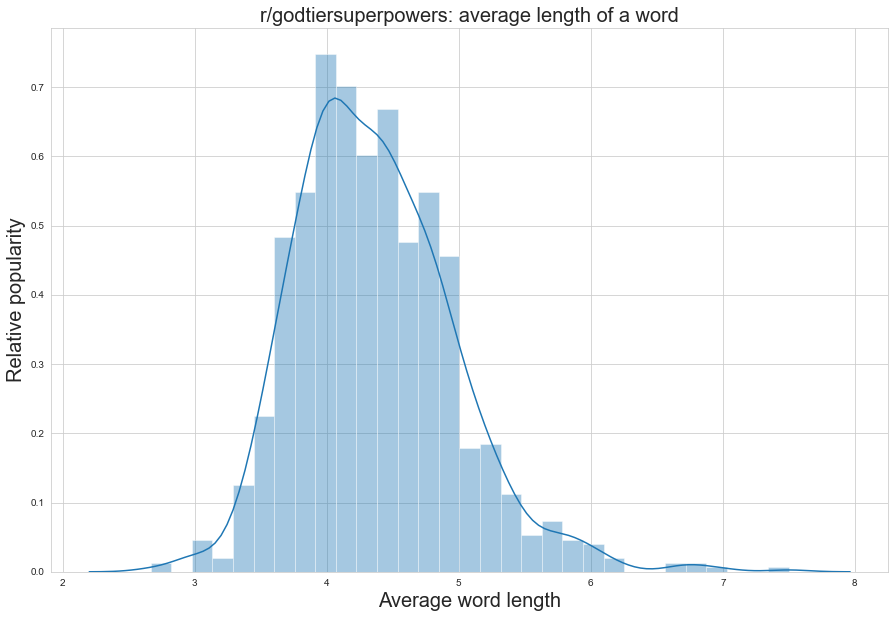

In [192]:
sns.set_style("whitegrid")
plt.figure(figsize=(15,10))

ax = sns.distplot(all_data[all_data["is_sub1"] == 0]["avg_word_len"])

ax.set_ylabel("Relative popularity", fontsize=20)
ax.set_xlabel("Average word length", fontsize=20)
ax.set_title("r/godtiersuperpowers: average length of a word", fontsize=20);

It looks like there might be a difference.

In [193]:
# print the means

print(all_data[all_data["is_sub1"] == 1]["avg_word_len"].mean())

print(all_data[all_data["is_sub1"] == 0]["avg_word_len"].mean())

4.379038385466968
4.36526934040579


In [194]:
# See if there is a difference
ttest_ind(all_data[all_data["is_sub1"] == 1]["avg_word_len"],
          all_data[all_data["is_sub1"] == 0]["avg_word_len"])

Ttest_indResult(statistic=0.4882192389836357, pvalue=0.6254513138225797)

p value is too high so there is no statistical difference between the lengths of words between the 2 subreddits.

In [195]:
# it's useless so just drop it
all_data.drop("avg_word_len", axis=1, inplace=True)

## Can we make a model that accurately predicts the category?
There seems to be some differences between the two subreddits so I think it may be possible.
- Not many posts shared between the two reddits
- Difference in sentence length
- godtiersuperpowers has more emojis/non-standard chars

I will try a baseline model but first we need to make everything lowercase and remove non-letter characters.

Replace all non-text with spaces, except for apostrophes which are replaced by nothing (so "you're" -> "youre" and not "you" "re")

In [43]:
# 
def only_chars_and_lowercase(text):
        
    regex_str = r"[^A-Za-z\'\’]"

    # word like 'doesn't' should become 'doesnt'
    regex_apostrophe = "[\’\']"

    text = re.sub(regex_str, " ", text)
    text = re.sub(regex_apostrophe, "", text)

    # split into individual words
    # this removes excess spaces
    text_split = text.split()

    # make it lowercase
    text_split = [s.lower() for s in text_split]

    # combine the words
    return " ".join(text_split)

In [44]:
all_data["title"] = all_data["title"].map(only_chars_and_lowercase)

Save the data as the cleaned version (uncomment to save)

In [45]:
# all_data.to_csv("../data/cleaned/top_posts_both.csv")
print("done")

done


# Data Dictionary <a class="anchor" id="dictionary"></a>
**This table is for the top 1000 posts of each subreddit**.

This is because I think that the top posts will give a clearer difference between the 2 subreddits. The hot data is used to check if the model generalizes to other types of posts at the end.

|Column|Mean|Standard Deviation|Other Info
|---|---|---|---|
|title|-|-|The title of the Reddit post. Non-letter characters are removed and turned into spaces, except apostrophes which were just removed. All text is lowercase. Is used for modelling|
|id|-|-|The unique ID of the reddit post used to identify duplicates. Not used for modelling.
|timestamp|1,573,905,725|14,633,038|Unix timestamp of post date. See 'days ago' column below for more context. Not used for modelling.|
|is_sub1|0.487|0.5|1 for shittysuperpowers, 0 for godtiersuperpowers. The target variable|
|days_ago|313.7|169.4|How many days ago the post was created, as of Unix time 1601013341. Not used for modelling. Shittysuperpowers has posts that go back significantly longer than godtiersuperpowers but the majority are within about 2-3 years|
|has_weird_chars|0.022|0.146|Whether the post title had non-standard characters before cleaning. Is used for modelling. The characters are defined as anything not a letter, digit, space, or these punctuations: ,.!?"'%“”’)(\/: These are a lot more common in godtiersuperpowers|
|sentence_len|14.86|8.24|Number of words in the sentence. For shittysuperpowers the mean is 13.99 and for godtiersuperpowers the mean is 15.68. Is used for modelling as there was a statistically significant difference. Some posts have very long titles (50+ words) and the shortest just one (e.g. "This") but most are within 8-20|


The same data was also collected for the 'hot' posts, although the mean and standard deviation will be different. See the corresponding section at the end.


# Preprocess/Model <a class="anchor" id="model"></a>

## Baseline accuracy
First, we should establish some baseline metrics so we know if the model works well. First is just taking the mean.

In [46]:
1 - all_data["is_sub1"].mean()

0.5132415254237288

So on average, if we just guess that a post came from r/godtiersuperpowers we would be correct about 51% of the time. This makes sense since we got 1000 posts from each subreddit (minus a few for NSFW).

So if a model can only predict with 50% accuracy then it is just guessing which is not helpful.

## Based on human guess
This seems like a pretty difficult choice of subreddits so I wasn't sure how well models could work. I decided to classify about 100 post titles by hand. The reasoning is that if a human can't classify the posts well it would be hard to do for a computer too.

Note: I did this using a spreadsheet on Google Docs, and just picked 100 random posts.

I got about 64% of them correct, which is better than just guessing, however it's still not that good. It just shows that these 2 subreddits are very similar. If the final model can be better than this, I will feel satisfied.

## Basic model
First, split data into train and test based on time.

In [47]:
all_data.head()

,title,id,timestamp,is_sub1,days_ago,has_weird_chars,sentence_len
846,you can turn into a goose once,t3_8hpuvr,1.525719e+09,1,871.466563,0,7
805,you can punch with half the strength of someone x as strong as you,t3_8hra7y,1.525729e+09,1,871.342697,0,14
589,you can unpee,t3_8rsl9y,1.529257e+09,1,830.514248,0,3
874,you are immune to clickbait but there are downsides number will shock you,t3_8wloxs,1.530896e+09,1,811.541366,0,13
872,can we get this kid on here,t3_900ux3,1.531959e+09,1,799.240000,0,7


In [48]:
# import stuff
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from sklearn.naive_bayes import MultinomialNB

In [49]:
# train test split
X_all = all_data[["title", "has_weird_chars", "sentence_len"]]
y_all = all_data["is_sub1"]

# no random state as we are splitting by time
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, shuffle=False)

### Create a pipeline that does the following:
- stems words
- count vectorize the words. This just counts how many times each word appears and puts them into a table.
- Add the other 2 columns we want (num of words and whether weird characters exist)
- Run it in a naive bayes classifier, which uses the conditional probability that a word is in sub1 but not sub2 (or the other way around) to determine which subreddit a post is likely to be in.

For things like stemming I have to wrap it with a class since the base function doesn't implement fit and transform methods

Also, for Naive Bayes, it works based on probability. Therefore I have to convert the 'sentence length' column into a boolean variable (right now it's just the number of words which is not boolean).

- Average shittysuperpowers sentence length: 13.986
- Average godtiersuperpowers sentence length: 15.682

The average of these two 14.83, so I just picked the categories as 15+ words and <15 words. Therefore the 'sentence length' column is 1 if there are 15 or more words, if not it's 0.

In [50]:
# inherit from this which implements fit
class BaseClass:
    def __init__(self):
        pass
    # class must implement fit, it doesnt do anything though
    def fit(self, X, y=None):
        return self

# wrapper for stemmer
class PorterStemmerWrapper(BaseClass):
    
    def transform(self, df):
        mystemmer = PorterStemmer()
        stemmed_words = []
        
        # loop through all rows
        for sentence in df["title"]:
            # loop through each word
            split_words = sentence.split()
            split_words = [mystemmer.stem(s) for s in split_words]
            stemmed_words.append(" ".join(split_words))
        
        return stemmed_words

# I also want to get the 2 columns that I feature engineered
# this class will get them only
class GetOtherColumns(BaseClass):
    
    # return the 2 desired columns
    def transform(self, df):
        return df[["has_weird_chars", "sentence_len"]]


# same as above but also converts sentence length to boolean
# only needed for naive bayes
class GetOtherColumnsBayes(BaseClass):
    def transform(self, df):
        df["sentence_len"] = [1 if s >=15 else 0 for s in df["sentence_len"]]
        return df[["has_weird_chars", "sentence_len"]]
    
    
# class to make the count/tfidf vectorized data to dense
class ToDense(BaseClass):

    def transform(self, data):
        return data.todense()
    
# stem and vectorize pipeline
steps = [("stem", PorterStemmerWrapper()),
         ("cvec", CountVectorizer(stop_words=ENGLISH_STOP_WORDS)),
         ("todense", ToDense())]

stem_and_vectorize = Pipeline(steps)

# Merge with feature engineered columns
preprocess_steps = [("stem_vect", stem_and_vectorize),
                    ("other_cols", GetOtherColumnsBayes())]

all_preprocess = FeatureUnion(preprocess_steps, n_jobs=-1)


# after preprocessing use naive bayes
final_steps = [("preprocess", all_preprocess),
               ("nbayes", MultinomialNB())]

complete_pipeline = Pipeline(final_steps, verbose = 1)

In [51]:
complete_pipeline.fit(X_train, y_train)
print("done")

[Pipeline] ........ (step 1 of 2) Processing preprocess, total=   2.6s
[Pipeline] ............ (step 2 of 2) Processing nbayes, total=   0.0s
done


### How did this basic model do?

In [52]:
complete_pipeline.score(X_train, y_train)

0.902542372881356

In [53]:
complete_pipeline.score(X_test, y_test)

0.6927966101694916

### Analysis of basic model

Good points:
- the code worked, which is good because I wasn't sure if feature union was used correctly.
- The accuracy on test data is already better than when I tried classifying manually.

Bad points:
- It doesn't generalize very well
- I haven't tuned the hyperparameters

Next, I can try to do a few things
- Try different hyperparameters with grid search CV
- Try different model/vectorizer (e.g. tfidf vectorizer, or logistic regression)
- Analyze the parameters to see if anything stands out.

## Try different hyperparameters
I already have the pipeline made so I will just try changing hyperparameters.

To reduce variance I try to:
- Reduce max features - by only predicting using more frequent words I can reduce variance
- Ignore words that are very popular since they don't contribute any info
- Ignore very uncommon words as they might cause random error.

In [54]:
from sklearn.model_selection import GridSearchCV

In [55]:
params = {"preprocess__stem_vect__cvec__max_features" : [100, 500, 1000, 5000, 10_000, None],
          "preprocess__stem_vect__cvec__max_df" : [1, 0.9, 0.8],
          "preprocess__stem_vect__cvec__min_df" : [2, 5, 10]}


gridsearcher = GridSearchCV(complete_pipeline, params, n_jobs = -1, cv=3, verbose=1)

In [56]:
gridsearcher.fit(X_train, y_train)
print("done")

Fitting 3 folds for each of 54 candidates, totalling 162 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 162 out of 162 | elapsed:   10.1s finished


[Pipeline] ........ (step 1 of 2) Processing preprocess, total=   0.4s
[Pipeline] ............ (step 2 of 2) Processing nbayes, total=   0.0s
done


In [57]:
print("Best accuracy: {}".format(gridsearcher.best_score_))
best_model = gridsearcher.best_estimator_

Best accuracy: 0.6271186440677966


### Hyperparameters
We can see that the ideal max proportion is 0.9 and the best number of features is 500. min_df is 2.

In [58]:
dict(best_model.named_steps["preprocess"].transformer_list).get("stem_vect").named_steps["cvec"]

CountVectorizer(max_df=0.9, max_features=500, min_df=2,
                stop_words=frozenset({'a', 'about', 'above', 'across', 'after',
                                      'afterwards', 'again', 'against', 'all',
                                      'almost', 'alone', 'along', 'already',
                                      'also', 'although', 'always', 'am',
                                      'among', 'amongst', 'amoungst', 'amount',
                                      'an', 'and', 'another', 'any', 'anyhow',
                                      'anyone', 'anything', 'anyway',
                                      'anywhere', ...}))

### Accuracy and AUC ROC

In [59]:
print("Train score")
print(best_model.score(X_train, y_train))
print("Test score")
print(best_model.score(X_test, y_test))

Train score
0.7655367231638418
Test score
0.6673728813559322


The model is doing about as well on the test data but the training score went down, so we can say it generalizes better. Again, it's better than a human so this is good news.

In [60]:
# Calculate the AUC ROC
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, best_model.predict(X_test))

0.6592190165393459

The AUC ROC is about .66, for naive bayes with stemming and count vectorizer.

# Other models
Let's try some other models and see if they can be more accurate. First let's import them and wrap the lemmatizer in a class so it can be pipelined.

In [61]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler

In [62]:
# Put lemmatizer into pipeline, so it needs a wrapper
class LemmatizerWrapper(BaseClass):
    def transform(self, df):
        mylemmatizer = WordNetLemmatizer()
        lemmed_words = []
        
        # loop through all rows
        for sentence in df["title"]:
            # loop through each word
            split_words = sentence.split()
            split_words = [mylemmatizer.lemmatize(s) for s in split_words]
            lemmed_words.append(" ".join(split_words))
        
        return lemmed_words


There are many combinations I want to test:
- Lemmatizing vs Stemming
- Count Vectorizing vs TFIDF Vectorizing
- KNN vs Naive Bayes vs Logistic Regression vs Other models (e.g. random forest)


## KNN
Set up a pipeline that lemmatizes, TFIDF vectorizes, then uses KNN. I didn't use StandardScaler on the vectorized words because:
- TFIDF makes more important words have larger coefficients, and scales it already.
- KNN uses the distance to nearest words, so if an important word is far away I want to penalize it more
- [This](https://datascience.stackexchange.com/questions/33730/should-i-rescale-tfidf-features) post on stack overflow says not to

I did, however, standard-scale the 2 numeric columns since those were not TFIDF-ed

In [63]:
# Lemmatize, then TFIDF
steps1 = [("lemma", LemmatizerWrapper()),
         ("tfidf", TfidfVectorizer(stop_words=ENGLISH_STOP_WORDS)),
         ("todense", ToDense())]
        
preprocess_1 = Pipeline(steps1)

# get numeric columns then standard scale
steps2 = [("numeric_cols" , GetOtherColumns()),
          ("scale" , StandardScaler())]

preprocess_2 = Pipeline(steps2)

# concatenate the 2 pipelines
preprocess_steps = [("lemma_tfidf", preprocess_1),
                    ("two_cols", preprocess_2)]

all_preprocess = FeatureUnion(preprocess_steps, n_jobs=-1)

# Test KNN
final_steps = [("preprocess", all_preprocess),
               ("knn", KNeighborsClassifier())]

knn_lemmatize = Pipeline(final_steps, verbose = 1)

In [64]:
# Use gridsearch CV to optimize hyperparameters

# try parameters near the previous one
params = {"preprocess__lemma_tfidf__tfidf__max_features" : [500, 1000, 5000],
          "preprocess__lemma_tfidf__tfidf__max_df" : [0.95, 0.9, 0.85],
          "knn__n_neighbors" : [3, 5, 7, 10]}


knn_gridsearcher = GridSearchCV(knn_lemmatize, params, n_jobs = -1, cv=3, verbose=1)

In [65]:
knn_gridsearcher.fit(X_train, y_train)
print("done")

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:   18.5s finished


[Pipeline] ........ (step 1 of 2) Processing preprocess, total=   0.3s
[Pipeline] ............... (step 2 of 2) Processing knn, total=   0.6s
done


In [66]:
best_knn = knn_gridsearcher.best_estimator_

In [67]:
print("Train score")
print(best_knn.score(X_train, y_train))
print()
print("Test score")
print(best_knn.score(X_test, y_test))

Train score
0.748587570621469

Test score
0.6186440677966102


Again it is overfitting. Also the accuracy isn't as good as before so I probably won't use KNN.

## Logistic Regression

Next, try Logistic Regression. I used Lasso since there are probably a lot of words that don't contribute to classification and I want to remove them. The vectorizer already has parameters for max features but that is more of a hard cap.

In [124]:
# Lemmatize, then TFIDF
steps1 = [("lemma", PorterStemmerWrapper()),
         ("tfidf", TfidfVectorizer(stop_words=ENGLISH_STOP_WORDS, min_df=5)),
         ("todense", ToDense())]
        
preprocess_1 = Pipeline(steps1)

# The other 2 numeric columns need to be scaled
steps2 = [("numeric_cols" , GetOtherColumns()),
          ("scale" , StandardScaler())]

preprocess_2 = Pipeline(steps2)

# concat in one pipeline
preprocess_steps = [("lemma_tfidf", preprocess_1),
                    ("other_cols", preprocess_2)]

all_preprocess = FeatureUnion(preprocess_steps, n_jobs=-1)


# logistic reg with lasso
final_steps = [("preprocess", all_preprocess),
               ("logreg", LogisticRegression(penalty='l1', solver='liblinear'))]

logreg_lemmatize = Pipeline(final_steps, verbose = 1)

# parameters to try in gridsearch
params = {"preprocess__lemma_tfidf__tfidf__max_features" : [500, 1000, 5000],
          "preprocess__lemma_tfidf__tfidf__max_df" : [0.95, 0.9, 0.85],
          "logreg__C" : [1/c for c in np.linspace(1, 20, 5)]}


logreg_gridsearcher = GridSearchCV(logreg_lemmatize, params, n_jobs = -1, cv=3, verbose=1)

In [121]:
logreg_gridsearcher.fit(X_train, y_train)
print("done")

Fitting 3 folds for each of 45 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:   12.2s finished


[Pipeline] ........ (step 1 of 2) Processing preprocess, total=   0.4s
[Pipeline] ............ (step 2 of 2) Processing logreg, total=   0.0s
done


In [122]:
best_logistic = logreg_gridsearcher.best_estimator_

In [123]:
print("Train score")
print(best_logistic.score(X_train, y_train))
print()
print("Test score")
print(best_logistic.score(X_test, y_test))

Train score
0.7175141242937854

Test score
0.625


Get the AUC ROC

In [72]:
logistic_predictions = best_logistic.predict(X_test)
roc_auc_score(y_test, logistic_predictions)

0.6233034191203739

We can see that logistic regression works better than KNN however not as well as Naive Bayes. I also tried changing between stemmer and lemmers but it doesn't change that much. The best model is probably using Naive Bayes.

## Best model: Naive Bayes <a class="anchor" id="bestmodel"></a>
We can see that the best model to use is Naive Bayes, it gave a better result than the other 2 models. I will try TFIDF vectorizer, and also tune the hyperparameters a bit more. Also, try 2-grams to see if it helps. This is because there may be words that are usually grouped together.

Once again the sentence length is converted into a boolean column using the special class made earlier

In [138]:
# set up the pipeline again
steps = [("stem", PorterStemmerWrapper()),
         ("vectorize", TfidfVectorizer(ngram_range=(1,2), stop_words=ENGLISH_STOP_WORDS)),
         ("todense", ToDense())]
        
preprocess_1 = Pipeline(steps)

# The other 2 numeric columns
preprocess_steps = [("preprocess_1", preprocess_1),
                    ("other_cols", GetOtherColumnsBayes())]

all_preprocess = FeatureUnion(preprocess_steps, n_jobs=-1)


# logistic reg
final_steps = [("preprocess", all_preprocess),
               ("nbayes", MultinomialNB())]

nbayes_pipe = Pipeline(final_steps, verbose = 1)

# parameters to try in gridsearch
params = {"preprocess__preprocess_1__vectorize__max_features" : [300, 400, 800],
          "preprocess__preprocess_1__vectorize__max_df" : [0.95, 0.97],
          "preprocess__preprocess_1__vectorize__min_df" : [4, 5, 6],
          "preprocess__preprocess_1__vectorize__ngram_range" : [(1,1), (1,2)]}


nbayes_gridsearcher = GridSearchCV(nbayes_pipe, params, n_jobs = -1, cv=5, verbose=1)

In [139]:
nbayes_gridsearcher.fit(X_train, y_train)
print("done")

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:   11.0s finished


[Pipeline] ........ (step 1 of 2) Processing preprocess, total=   0.3s
[Pipeline] ............ (step 2 of 2) Processing nbayes, total=   0.0s
done


In [141]:
best_nbayes_model = nbayes_gridsearcher.best_estimator_

Find the hyperparameters the grid search determined was best:

In [142]:
best_nbayes_model

Pipeline(steps=[('preprocess',
                 FeatureUnion(n_jobs=-1,
                              transformer_list=[('preprocess_1',
                                                 Pipeline(steps=[('stem',
                                                                  <types.PorterStemmerWrapper object at 0x00000288232EA730>),
                                                                 ('vectorize',
                                                                  TfidfVectorizer(max_df=0.95,
                                                                                  max_features=400,
                                                                                  min_df=5,
                                                                                  ngram_range=(1,
                                                                                               2),
                                                                                  stop_words=frozens

Get the scores

In [143]:
print("Train score")
print(best_nbayes_model.score(X_train, y_train))
print("Test score")
print(best_nbayes_model.score(X_test, y_test))


Train score
0.7492937853107344
Test score
0.6716101694915254


In [144]:
print("AUC ROC")
print(roc_auc_score(y_test, best_nbayes_model.predict(X_test)))

AUC ROC
0.6659311725877031


## Analysis of best model

We can see that the best model is Naive Bayes as it has the best accuracy. We then tuned the hyperparameters and reduced the variance. The model has generalized better (not perfectly) and the score is better than a human.

These 2 subreddits are difficult to distinguish since they have a lot of similarities, so I am ok with this relatively high rate of error as even a human trying to classify text didn't have very good results (64% human accuracy)

Another very interesting thing is that the model prefers to use (up to) 2-grams instead of just 1-grams. Therefore there must be a lot of very common word combinations especially as it went with max_features = 400 which is quite few.

Let's see what the model is using to make predictions.

## Analyze the coefficients of Naive Bayes
We would like to see which words contribute the most to classification. Extract the coefficients from the model.

In [145]:
nbayes_coeffs = list(best_nbayes_model.named_steps["nbayes"].coef_[0])
nbayes_counts = list(best_nbayes_model.named_steps["nbayes"].feature_count_[0])

In [146]:
# get the words
nbayes_words = dict(best_nbayes_model.named_steps["preprocess"].transformer_list).get(
                "preprocess_1").named_steps["vectorize"].get_feature_names()


# add in the sentence length and number of weird chars as params too
nbayes_words.extend(["has_weird_chars", "sentence_len"])

In [147]:
# Create a DF with the best words, and their coefficients
nbayes_coeffs_df = pd.DataFrame( [nbayes_words, nbayes_coeffs, nbayes_counts]).transpose()

nbayes_coeffs_df.columns = ["word", "naive_bayes_coeff", "counts"]

In [148]:
# add column with absolute value (for sorting)
nbayes_coeffs_df["abs_coeff"] = np.abs(nbayes_coeffs_df["naive_bayes_coeff"])

### Most common words:

In [149]:
# most common words
nbayes_coeffs_df.sort_values(by="counts", ascending=False).head(10)

,word,naive_bayes_coeff,counts,abs_coeff
401,sentence_len,-1.97992,312,1.97992
10,ani,-4.72382,32.182,4.72382
294,say,-5.17827,25.6608,5.17827
350,time,-4.45967,24.8761,4.45967
107,everi,-4.68237,23.5784,4.68237
346,thi,-4.84559,19.769,4.84559
16,anyth,-6.15529,15.5551,6.15529
210,make,-4.43218,13.6146,4.43218
9,alway,-5.37646,13.309,5.37646
316,someon,-4.87849,13.1746,4.87849


**Note**: ignore sentence_len, it's not a word, it's the feature engineered column added in.

"ani" (any), "time", and "everi" (every) are the most popular. It seems that a lot of superpowers focus around things like "any time you do X", or "instantly". Of course this ignores the stop words, and words with >95% occurrence so there might be some words missing from this. It also ignores words that occur less than 5 times.

### Important note for stakeholders:
As these are the most common words, if you want to make a 'unique' super power then try to stay away from things like "[Any time/whenever] you [do/say] X, someone will Y" as they are very overused.

### Words used for classifying
By taking the largest coefficient (absolute value) from the Naive Bayes model, we can see what the model determines to be the words most unique to one subreddit.

In [150]:
# Sort by abs coeff
nbayes_coeffs_df.sort_values(by="abs_coeff", ascending=False).head(20)

,word,naive_bayes_coeff,counts,abs_coeff
293,said,-7.62537,2.89691,7.62537
86,did,-7.62537,2.88452,7.62537
17,anytim,-7.62537,3.7765,7.62537
134,friend,-7.62537,2.88159,7.62537
280,real life,-7.62537,3.55231,7.62537
91,dollar,-7.62537,3.40501,7.62537
181,item,-7.62537,2.48379,7.62537
27,bad,-7.34053,3.78142,7.34053
14,answer,-7.32828,5.3065,7.32828
357,travel,-7.3212,1.73084,7.3212


Here we can see which words Naive Bayes found the most useful in differentiating between the 2 subreddits.

Just check the original data to see if the coefficients make sense - words in the table above should be strongly related to one subreddit.

In [151]:
# need original data (not X_train) since it has the target col
all_data[all_data["title"].str.contains("said")]

,title,id,timestamp,is_sub1,days_ago,has_weird_chars,sentence_len
1563,if you yell what you are going to do and after say and nobody can fucking stop me nobody even reality and the laws of physics cant stop you from doing what you said you were going do,t3_bx56gt,1.559755e+09,0,477.525069,0,39
1170,if you invent a meme format you get a share of karma from every meme made in said format,t3_dqjr2c,1.572699e+09,0,327.709664,0,19
1458,whenever you wish someone else good luck on a task he she is guaranteed to succeed on said task,t3_dz12w8,1.574251e+09,0,309.750289,0,19
1263,you can breath lighting like a dragon can breath fire but it requires a nearby source of electricity lighting strike transformer battery etc to work and it drains the electricity from said object the more electrical power nearby the more effective your lightning breath,t3_e0et6z,1.574495e+09,0,306.927569,0,44
1690,you know every stat about every person you meet how many strawberries had this person eaten whats the longest this man has gone between saying hello he said hello at am on thursday november th and did not say hello again until tuesday th at days hours and minutes,t3_eh7op3,1.577636e+09,0,270.569572,1,50
1133,your internet connection is always optimal no lag that said you cant blame lag for being bad at pvp games but you have super good internet all the time can i get a high five,t3_f12sjo,1.581219e+09,0,229.106921,0,36
1114,you have a spidey sense except the said object or direction of incoming danger signals you via,t3_f9nan0,1.582690e+09,0,212.080174,1,17
1154,you can change what you said in an argument if later you think of a better comeback in the shower,t3_hh9ju4,1.593325e+09,0,88.987685,0,20
1394,you can play back a recording of the last thing someone said when theres a dispute about word usage,t3_hj9dcw,1.593607e+09,0,85.720914,0,20
670,people fart when theyre around you and you can control the intensity and volume of said farts ex lvl little poot lvl fart their soul out,t3_itjn1g,1.600211e+09,1,9.291782,0,27


We can see that if the word 'said' is present, the post probably has is_sub1 = 0 (i.e. it's in godtiersuperpowers)

## Investigate words used for classification
For the top 100 words, see if it's mostly in one or the other subreddit.

In [154]:
# get the words used to classify
classifier_words = nbayes_coeffs_df.sort_values(by="abs_coeff", ascending=False).head(100)

sub1_words = []
sub2_words = []

# print each word but only if it appears mostly in one or the other
for word in classifier_words["word"]:
    num_occurrence = all_data[all_data["title"].str.contains(word)]["is_sub1"].mean()
    if num_occurrence > 0.7:
        sub1_words.append(word)
    elif num_occurrence < 0.3:
        sub2_words.append(word)
        
print("Words mostly in shittysuperpowers")
print(", ".join(sub1_words))

print()

print("Words mostly in godtiersuperpowers")
print(", ".join(sub2_words))

Words mostly in shittysuperpowers
batteri, dont know

Words mostly in godtiersuperpowers
said, did, anytim, friend, real life, dollar, item, bad, answer, travel, knowledg, fall asleep, asleep, transport, comfort, better, task, option, wish, rememb, video, learn, onlin, state, fix, end, argument, draw, earn, new, heal, damag, univers, text, write, paus, type, includ, free, physic, brain, drive, forget, remov, automat, work, food, ask, doubl, whatev


As we can see most of these words are in r/godtiersuperpowers. This is a very clear result: out of the top 100 classifying words, only 3 were in shittysuperpowers. This means that godtiersuperpowers has a lot more unique-ness within its posts.

## Important takeaway for stakeholders
**Most of these words that the model to predict are used only occur in godtiersuperpowers** This means that godtiersuperpowers uses more vocabulary than shittysuperpowers. If we follow the subreddit rules this means that using more different vocabulary leads to sentences that are:
- funnier
- super powers that are unexpectedly useful

So if you are a comedian trying to be funny or a writer thinking of new ideas, you should try to be unique and use less common words.

The data also shows what makes a superpower either unique or funny - they are ones relating to dreams, saying things, money (dollars), or friends.etc


## Word cloud
If the whole document was just summarized into one chart, it would be this one. This just shows the most important words that the model used to classify text, and since most of them are from godtiersuperpowers, it just shows how much more vocabulary is used in that subreddit as opposed to the other one.

I just made a word cloud online as it lets you pick a super-hero themed shape. Also I made the words into actual english words instead of the stem so it looks nicer.

In [119]:
print("God Tier Super Powered Words")
Image(url= "./superpower_wordcloudpng.png")

God Tier Super Powered Words


## Analysis continued

We saw that TFIDF with Naive Bayes was the best model. Why is this? (Apart from just having a better accuracy/AUC ROC)

TFIDF vs Count Vectorizer didn't have a big change. The benefit of using TFIDF vectorizer is that it accounts for the popularity of a word based on how often it's used. This means that words which are more popular are weighted higher. However, there are 2 major reasons why it didn't create that much of a difference:
- Stop words are already removed
- Naive Bayes already uses the probability of a word being in a subreddit but not the other one, which does something similar to TFIDF. If a word is very common then Naive Bayes will already ignore it.

Why Naive Bayes?
- It performed better than the other models tested
- The post titles are short so the conditional assumption of Naive Bayes (that words are independent) is probably not too hard to follow, which helps it a bit.
- Words which are related were grouped using n-grams which helps this assumption too

# Does Model Generalize? <a class="anchor" id="hotpost"></a>
So far, we have been testing the model on the top posts of each subreddit. However, I have also scraped the 'hot' posts using the json API. I want to know if the model will work on these as well.

As these hot posts are basically just the most recent posts, the model probably won't have as good of a prediction since there is more random error mixed in, e.g. from people not following posting rules.

However, it is important to do this since we would like to know if the model can predict interesting sentences in a more noisy environment. It's also a good test to see if the model can generalize to other related, but not identical situations.

First, read in the data:

In [156]:
# Get hot data
hot_sub1 = pd.read_csv("../data/scraped_subreddit_1/hot_from_json_1.csv")
hot_sub2 = pd.read_csv("../data/scraped_subreddit_2/hot_from_json_2.csv")

hot_sub1["is_sub1"] = 1
hot_sub2["is_sub1"] = 0

In [157]:
# Remove the rules post
hot_sub1.drop(0, axis=0, inplace=True)

In [158]:
# Remove the rules and discord posts
hot_sub2.drop([0,1], axis=0, inplace=True)

In [159]:
# make into one big df
all_hot_posts = pd.concat([hot_sub1, hot_sub2])

In [160]:
# drop extra col
all_hot_posts.drop("Unnamed: 0", axis=1, inplace=True)

In [161]:
# rename cols
all_hot_posts.rename({"0" : "title",
                 "1" : "id",
                 "2" : "timestamp"}, axis=1, inplace=True)

In [162]:
all_hot_posts.head()

,title,id,timestamp,is_sub1
1,"Any water gun you shoot fires actual bullets, while any real gun shoots water.",t3_izzgfn,1.601124e+09,1
2,You now have the ability to make babies cry or shit on command.,t3_j00mg1,1.601129e+09,1
3,You can make someone pee for you when you feel like peeing.,t3_j00192,1.601126e+09,1
4,You can predict the end of a movie though it takes as long as the movie itself to to that,t3_iztyol,1.601103e+09,1
5,You can tell if a person is romantically interested in you but only after you shit your pants in front of them,t3_izw0q5,1.601111e+09,1


### Data Cleaning
Just clean it a bit to make sure there's nothing weird.

In [163]:
# check for duplicates, there's a lot
all_hot_posts[all_hot_posts.duplicated(subset="id", keep=False)]

,title,id,timestamp,is_sub1
1,"Any water gun you shoot fires actual bullets, while any real gun shoots water.",t3_izzgfn,1.601124e+09,1
2,You now have the ability to make babies cry or shit on command.,t3_j00mg1,1.601129e+09,1
3,You can make someone pee for you when you feel like peeing.,t3_j00192,1.601126e+09,1
4,You can predict the end of a movie though it takes as long as the movie itself to to that,t3_iztyol,1.601103e+09,1
5,You can tell if a person is romantically interested in you but only after you shit your pants in front of them,t3_izw0q5,1.601111e+09,1
...,...,...,...,...
954,You change your gender after having sex.,t3_ixlkub,1.600803e+09,1
955,"Whenever you say “Or is it?”, Vsauce music starts playing",t3_ixqyc6,1.600821e+09,1
956,You get to choose your own power in the comments and I reply with side effects,t3_ixx5hq,1.600840e+09,1
957,"You summon any object in front of you by scheming at the top of your lungs ""GIVE ME (insert object here)!""",t3_ixyibi,1.600845e+09,1


I want to avoid posts that are in both subreddits so I dropped them.

In [164]:
# remove them (all duplicates, don't keep any)
all_hot_posts.drop(all_hot_posts.index[all_hot_posts.duplicated(subset="id", keep=False)],
                   inplace=True)

I also want to check if any post was submitted twice in case people submitted it to both subreddits.

In [165]:
# check for duplicated titles
all_hot_posts[all_hot_posts.duplicated(subset="title", keep=False)]

,title,id,timestamp,is_sub1
547,Whenever you say “Is it possible to learn this power” you immediately learn it,t3_ivgaw0,1.600498e+09,1
309,Whenever you say “Is it possible to learn this power” you immediately learn it,t3_ivkdxz,1.600513e+09,0
593,You can reverse anything,t3_it1bb4,1.600171e+09,0
603,You have the ability to manipulate probability,t3_isnxt7,1.600129e+09,0
617,You have the ability to manipulate probability,t3_ispaj5,1.600133e+09,0
629,You can reverse anything,t3_it1bbb,1.600171e+09,0


In [166]:
# remove the one that is in both subreddits
all_hot_posts.drop(all_hot_posts.index[all_hot_posts["id"].isin(["t3_ivgaw0", "t3_ivkdxz"])],
                   inplace=True)

Also for the posts below they were submitted twice to the same subreddit. Not sure if it counts as a different post, but I just removed one copy.

In [167]:
# check that the above is deleted properly
all_hot_posts[all_hot_posts.duplicated(subset="title", keep=False)]

,title,id,timestamp,is_sub1
593,You can reverse anything,t3_it1bb4,1.600171e+09,0
603,You have the ability to manipulate probability,t3_isnxt7,1.600129e+09,0
617,You have the ability to manipulate probability,t3_ispaj5,1.600133e+09,0
629,You can reverse anything,t3_it1bbb,1.600171e+09,0


In [168]:
# also drop one of the duplicated titles
all_hot_posts.drop(all_hot_posts.index[all_hot_posts.duplicated(subset="title")], inplace=True)

Now we just need to do all of the preprocessing steps from before, which is removing puncuation, adding the number of words in each sentence.etc

I made a class that has all of the functions from above and just imported it in.

In [169]:
import mytransformer

In [170]:
preprocess_transformer = mytransformer.PreprocessTransformer()
all_hot_posts = preprocess_transformer.transform(all_hot_posts)

# check that it worked properly
all_hot_posts.sample(3)

,title,id,timestamp,is_sub1,has_weird_chars,sentence_len
478,you can break anyones bone by breaking your own bone,t3_ivbvy2,1.600483e+09,1,False,11
419,you can clean your butt in one wipe guaranteed,t3_iule8h,1.600384e+09,0,False,9
551,you can speak in tongues,t3_ivhnvk,1.600502e+09,1,False,5


### Save it as a csv file
Uncomment to save

In [171]:
# all_hot_posts.to_csv("../data/cleaned/hot_posts_both.csv")

## Data Dictionary for hot posts <a class="anchor" id="hotdictionary"></a>

It's basically the same as the one for the top posts, just without the column that shows Unix time as days.

File is saved as data/cleaned/hot_posts_both.csv

|Column|Mean|Standard Deviation|Other Info
|---|---|---|---|
|title|-|-|The title of the Reddit post. Non-letter characters are removed and turned into spaces, except apostrophes which were just removed. All text is lowercase. Is used for modelling|
|id|-|-|The unique ID of the reddit post used to identify duplicates. Not used for modelling.
|timestamp|1,600,403,302|747,264|Unix timestamp of post date. Not used for modelling.|
|is_sub1|0.477|0.5|1 for shittysuperpowers, 0 for godtiersuperpowers. The target variable|
|has_weird_chars|0.018|0.134|Whether the post title had non-standard characters before cleaning. Is used for modelling. The characters are defined as anything not a letter, digit, space, or these punctuations: ,.!?"'%“”’)(\/:|
|sentence_len|14.03|8.33|Number of words in the sentence. Is used for modelling.|

## Test model on hot posts
Get the baseline (mean)

In [172]:
1 - all_hot_posts["is_sub1"].mean()

0.5233751425313569

If we predict all posts are from r/godtiersuperpowers we will be 52% accurate.

Get the columns we want from the hot posts

In [173]:
# Get the relevant columns for our model
hot_X = all_hot_posts[["title", "has_weird_chars", "sentence_len"]]
hot_y = all_hot_posts["is_sub1"]

# predict using the best model from above
hot_predictions = best_nbayes_model.predict(hot_X)
print("done")

done


See how well the model works on posts from 'hot'

In [174]:
# get accuracy
best_nbayes_model.score(hot_X, hot_y)

0.5929304446978335

In [175]:
# get roc auc
roc_auc_score(hot_y, hot_predictions)

0.5934812521499827

We can see that the model is a better than random guessing (the baseline) so it has some use.

However the accuracy isn't that good, most likely because posts in 'hot' have a lot more noise, and may not be drawn from the same population as 'top' posts (the top posts are self selecting for how funny or unique they are).

This isn't necessarily a bad thing since it shows that top posts are significantly funnier/more interesting than the average posts, enough that a computer can find the differences, and that it was a good idea to use the top posts instead of hot as our objective was to determine whether a sentence was interesting.

# Conclusion <a class="anchor" id="conclusion"></a>

### Best model
After cleaning the data, and testing a bunch of different models, we found that Naive Bayes with a TFIDF vectorizer was the best model for predicting if a post was interesting (as we are considering r/godtiersuperpowers posts to be more interesting than r/shittysuperpowers)

### How successful was it?
The model was more successful than a human when tested on all-time top posts (67% for model, 64% for human). The stated goal was achieved. However, there is still room for improvement since about 30% of the time, the model predicts wrongly. Part of this is because the 2 subreddits are very similar so the random error causes a lot of problems.

In addition, the model doesn't work as well on 'hot' posts instead of top posts, this is probably because the top posts have some interesting quality to them that made them top. However, the model still does better than guessing at a ~60% accuracy.

### Findings
Some factors that make a title more interesting, and more likely to be in r/godtiersuperpowers
- Longer title
- Rarer words
- More unique characters (e.g. emojis)

To summarize, should a writer wish to engage more with their audience, they would be well-advised to use a broader spectrum of vocabulary, provide more extensive descriptions, and👏use👏more👏emojis, like in this sentence.

The model was also able to figure out what post titles were considered interesting or not by looking at the vocabulary. However, the accuracy was not that good, and this was only tested with respect to Reddit post titles (for example it probably won't be able to tell you if a joke is funny or not, since the format is so different).

### Info For Stakeholders
- For writers of books/films, try to avoid using superpowers that are of the form 'If you do X, Y will happen instantly'. Everyone's super-power idea involves something like that so it isn't unique at all.
- For comedians try to use rare words (emojis too) as that might be funnier
- For social scientists studying differences between 2 communities with very similar backgrounds: there seems to be some difference as both a human and a computer were able to classify posts better than random chance, however there are still a lot of similarities (in this case) because neither humans or computers could get a very high accuracy.

Note that this model predicted based on the presence of some specific 'interesting' words. For example, 'travel' is considered interesting. However if this were a discussion board about travelling, then it probably wouldn't be a very interesting word. Depending on the context in which it is used in, the model may not be that useful.

### Future Steps
By collecting more data, a more accurate prediction can be made.

Also, there are other subreddits which are good for determining how interesting text is. For example r/pointlessstories vs r/writingprompts has stories which are interesting vs uninteresting. These subreddits may also have a clearer distinction between the two of them as well as more text to collect.

Finally, using more advanced models (e.g. neural nets) it might be be possible to extract more nuance from the sentences. Right now the model just uses a bag-of-words which doesn't take into account the relationships between the words in a sentence (other than adjacent words captured using 2-grams)

## The end